# Computational Physics - Exercise 2 (part 1/2)

The goal of this exercise is to find the ground state energy of deuteron using the variational method. In order to do that we exploit as trial functions the eigenfunctions of 3D harmonic oscillator (Gaussians) and the given form for the potential energy. Firstly, we fix the value of the Gaussian widht ($\nu$) and vary the number of wavefunctions from 1 to 30. Then we fix 30 wavefunctions and we vary the parameter $\nu$. Both procedures are done in order to find the best value of the ground state energy, which turns out to be $ -2.2017 \rm{MeV} $.

In [1]:
# Importiamo le librerie necessarie

import numpy as np
from scipy.integrate import quad
import scipy.constants as sp
import math
from scipy.linalg import eigh
from pylab import xlabel,ylabel
import matplotlib.pyplot as plt
from scipy import special

In the following cell, we fix the constant parameters that we use in this exercise. Firstly, we choose $\nu = 0.11 \rm{fm^{-2}}$. This value comes from imposing the Gaussian standard deviation equal to the size of deuteron ($ 2.126 \rm{fm} $):
$$
e^{-\nu r^{2}} = e^{- \frac{r^{2}}{\frac{2}{2\nu}}} \equiv e^{- \frac{r^{2}}{ 2\sigma^{2}}}
$$
so the standard deviation is 
$$
\sigma = \sqrt {\frac{1}{2\nu}} \equiv 2.126 \rm{fm}
$$
and finally $\nu$:
$$
\nu = \frac{1}{2\cdot (2.126)^{2}} \simeq 0.11 \rm{fm^{-2}}.
$$
We then find the reduced mass as:
$$
\mu = \frac{m_{p}m_{n}}{m_{p}+m_{n}}
$$
where $m_{p} \simeq 938.27 \rm{MeV / c^{2}} $ and $m_{n} \simeq 939.57 \rm{MeV / c^{2}} $.
Finally, we figure out the term $\frac{\hbar^{2}}{2\mu}$ that has to be multiplied to obtain the kinetic energy in Mev:
$$
\frac{ \hbar^{2}}{2 \mu} = \frac{ \hbar^{2} c^{2}}{2\mu c^{2}}.
$$
On the other hand we know that $\hbar c \simeq 197.32 \rm{MeV \cdot fm}$ and $\mu \simeq 469.46 \rm{MeV/c^{2}} $, so:
$$
\frac{ \hbar^{2} c^{2}}{2\mu c^{2}} \simeq \frac{(197.32)^{2}\rm{MeV^{2}fm^{2}}}{2\cdot 469.46 \rm{\frac{MeV}{c^{2}}c^{2}}}
$$
so the dimension is $\rm{MeV fm^{2}}$.


In [2]:
# Dati iniziali

hc = sp.hbar*sp.c*10**(28)/1.6022 # h_bar*c in MeV*fm
nu = 0.11 # in fm^(-2)
m_protone = 938.27; # in MeV/c^2
m_neutrone = 939.57; # in MeV/c^2
mu = m_protone * m_neutrone / (m_protone + m_neutrone)
prefactor = hc**2 / (2*mu)
M = 30 # number of radial wave functions


In [3]:
# Polinomi di Hermite

def He(x,n):
    h0=1
    if(n==0):
        return h0
    h1=2*x
    if(n==1):
        return h1
    if(n>1):
        for i in range(2,n+1):
            h2=2*x*h1-2*(i-1)*h0
            h0=h1
            h1=h2
        return h2

In order to find out the correct expression of the normalization constant $ \tilde N_n(\nu) $ appearing in the expression of the radial basis $ R_n(r) $, we exploit the orthogonality of the Hermite polynomials under a Gaussian measure, i.e. :
$$
\int_{-\infty}^{+\infty} dx H_{m}(x)H_{n}(x)e^{-x^{2}} = \sqrt{\pi}2^{n}n!\delta_{n,m}.
$$
Due to the presence of the $ \delta_{n,m} $ in the above expression, we take $ n = m $, so that we can rewrite it as:
$$
\int_{0}^{+\infty} dx |H_{n}(x)|^{2} e^{-x^{2}} = \sqrt{\pi}2^{n-1}n!,
$$
where $ \int_{-\infty}^{+\infty} dx |H_{n}(x)|^{2}e^{-x^{2}} = 2 \int_{0}^{+\infty} dx |H_{n}(x)|^{2}e^{-x^{2}} $, since the integrand function is even.
Moreover, we consider here the integral from $ x = 0 $ to $ x = +\infty $, rather than from $ x = -\infty $ to $ x = +\infty $, since we are dealing with $ R_n(r) $, which depends on the radial coordinate $ r $, that can only take positive values.
In particular, we have:
$$
R_{n}(r) = \tilde N_n(\nu) \frac{e^{-\nu r^{2}}}{r} H_{2n+1}(\sqrt{2\nu}r),
$$
so that in this case $ x \equiv \sqrt{2\nu}r $.
As a result by imposing the normalization we have:
$$
\int_{0}^{+\infty} dr r^{2} |R_{n}(r)|^{2} = 1.
$$
We can now insert the explicit expression of $ R_{n}(r) $, so that:
$$
\int_{0}^{+\infty} dr r^{2} |\tilde N_n(\nu)|^{2} \frac{e^{-2\nu r^{2}}}{r^{2}} |H_{2n+1}(\sqrt{2\nu}r)|^{2} = |\tilde N_n(\nu)|^{2} \int_{0}^{+\infty} dr r^{2} \frac{e^{-2\nu r^{2}}}{r^{2}} |H_{2n+1}(\sqrt{2\nu}r)|^{2} = 1.
$$
We now use the above definition of the variable $ x $, so that the differential becomes $ dx = \sqrt{2\nu} dr $ and therefore we obtain:
$$
|\tilde N_n(\nu)|^{2} \frac{1}{\sqrt{2\nu}} \int_{0}^{+\infty} dx e^{-x^{2}} |H_{2n+1}(x)|^{2} = |\tilde N_n(\nu)|^{2} \frac{1}{\sqrt{2\nu}}[\sqrt{\pi}2^{2n}(2n + 1)!],
$$
so that we finally get:
$$
|\tilde N_n(\nu)|^{2} = \sqrt{\frac{2\nu}{\pi}} \frac{1}{4^{n}(2n+1)!}.
$$

In [4]:
# Fattore di normalizzazione

def N(n):
    N_quadro = np.sqrt(2*nu/sp.pi) / (4**n * math.factorial(2*n+1))
    N = np.sqrt(N_quadro)
    return N       

We can easily verify that the radial wavefunctions are now correctly normalized to 1.

In [5]:
# Funzioni d'onda radiali e verifica della normalizzazione

def R(r,n):
    x = np.sqrt(2*nu) * r
    R = N(n) * np.exp(- nu * r**2) * He(x,2*n+1) / r
    return R

with open("verifica2.txt", "w") as ff:
    for n in range(M+1):
        roots2, pesi2 = special.roots_hermite(2*M+2)
        froots2 = N(n)**2 / (np.sqrt(2*nu)) * (He(roots2,2*n+1))**2
        prova2 = np.dot(froots2,pesi2)/2
        print(prova2, file=ff)        

verifica = np.zeros(M,float)
for n in range(M):
    roots3, pesi3 = special.roots_hermite(2*M+2)
    froots3 = N(n)**2 / (np.sqrt(2*nu)) * (He(roots3,2*n+1))**2
    verifica[n] = np.dot(froots3,pesi3)/2    

Let us now move on to computation of the matrix elements of the kinetic energy:
$$ 
\bra{mj} \hat{K} \ket{nk} = \int_{0}^{\infty}dr r^{2}R_{m}(r) \bra{j} \left(-\frac{\hbar^{2}}{2m}\nabla^{2}\right)R_{n}(r)\ket{k} = \int_{0}^{\infty}dr r^{2}R_{m}(r) \left(-\frac{\hbar^{2}}{2m}\nabla^{2}\right)R_{n}(r)\braket{j|k} =\\ = \int_{0}^{\infty}dr r^{2}R_{m}(r) \left(-\frac{\hbar^{2}}{2m}\nabla^{2}\right)R_{n}(r)\delta_{jk}
$$
where:
$$
\nabla^{2} = \frac{d^{2}}{dr^{2}} + \frac{2}{r}\frac{d}{dr}
$$
is the Laplacian operator in radial coordinates.
We therefore note that the elements of the kinetic energy are different from zero only if we take them between two equal spin-isospin state.
Then, we exploit the orthogonality relation of the Hermite polynomials that we have previously used for the purpose of finding out the normalization constant $ \tilde N_n(\nu) $ , i.e.:
$$
\int_{-\infty}^{+\infty} dx H_{m}(x)H_{n}(x)e^{-x^{2}} = \sqrt{\pi}2^{n}n!\delta_{n,m}.
$$
Furthermore, we make use of the following recursion relation, through which the Hermite polynomials are defined:
$$
H_{n+1}(x) = 2xH_{n}(x) - 2nH_{n-1}(x).
$$
Finally, we consider also the recursive formula for the derivatives of the Hermite polynomials:
$$
H'_{n}(x) = 2nH_{n-1}(x) \Longrightarrow H''_{n}(x) = 4n(n-1)H_{n-2}(x)
$$
After some mathematical and algebraic manipulations, one can show that the final expression of the generic matrix element of the kinetic energy reads:
$$
\bra{m} \hat{K} \ket{n} = -\frac{\hbar^{2}}{2\mu} \nu \sqrt{(2m + 2)(2m + 3)}\delta_{m,n-1} + \frac{\hbar^{2}}{2\mu} \nu (4m + 3)\delta_{m,n} - \frac{\hbar^{2}}{2\mu} \nu \sqrt{2m(2m + 1)}\delta_{m,n+1},
$$
where $ \mu $ is the reduced mass of the deuteron.

In [6]:
# Derivate dei polinomi di Hermite

def dHe(x,n):
    if(n==0):
        return 0
    else:
        H_prime = 2*n*He(x,n-1)
        return H_prime

def d2He(x,n):
    if(n==0 or n==1):
        return 0
    else:
        H_second = 4*n*(n-1)*He(x,n-2)
        return H_second

In [7]:
# Elementi di matrice dell'energia cinetica

def kinetic_element(m,n):
    if (m == n-1):
        risultato1 = (- prefactor) * nu * np.sqrt((2*m+2)*(2*m+3))
        return risultato1
    elif (m == n):
        risultato2 = (+ prefactor) * nu * (4*m+3)
        return risultato2
    elif (m == n+1):
        risultato3 = (- prefactor) * nu * np.sqrt(2*m*(2*m+1))
        return risultato3
    else:
        return 0
    

Now, we have to compute the matrix elements of the potential. First of all, we note that the potential contains terms which only depends on the radial coordinate, namely $V_{R}(r)$, $V_{S}(r)$ and $V_{T}(r)$, and terms which depend on the spin degrees of freedom, through the permutation operator $P^{\sigma}$. So, the generic matrix element between two states $R_{m}(r) \phi_{j}$ and $R_{n}(r) \phi_{k}$ is:

$$
\bra{mj}\hat{V}\ket{nk} = \int_{0}^{+\infty} dr r^{2} R_{m}(r) V_{R}(r) R_{n}(r) \delta_{jk}  
+ \dfrac{1}{2} \int_{0}^{+\infty} dr r^{2} R_{m}(r) V_{T}(r) R_{n}(r) \bra{j}(1+P^{\sigma})\ket{k} + \\
+ \dfrac{1}{2} \int_{0}^{+\infty} dr r^{2} R_{m}(r) V_{S}(r) R_{n}(r) \bra{j}(1-P^{\sigma})\ket{k}.
$$

Let us firstly focus on the radial degrees of freedom. The integrals can be computed by means of the Gauss-Hermite quadrature rule. If $f(x)$ is a polynomial, then the following integral can be computed exactly as a sum:

$$
    \int_{-\infty}^{+\infty} dx e^{-x^{2}} f(x) = \sum_{i = 0}^{n} \omega_{i} f(x_{i}) = \vec{\omega} \cdot \vec{f(x)}
$$

where ${x_{i}}$ are the points where the rule computes the integrals and ${\omega_{i}}$ are weights assigned to the values of the function $f$ at each ${x_{i}}$. The parameter to give to the Python routine that computes this rule is equal to the degree of the polynomial $f(x)$. Therefore, we have to recast the integrands in each of the three integrals appearing in the complete matrix element such that they becomes of the form $e^{-x^{2}}f(x)$. We explicitly report the computation for the first integral (the one with $V_{R}(r)$). The other two can be done analogously, changing the parameters in the expressions of the potentials $V_{S}(r)$ and $V_{T}(r)$:

$$
\bra{m}{V_{R}(r)}\ket{n} = v_{0r} \int_{0}^{+\infty} dr r^{2} R_{m}(r) e^{-k_{R}r^{2}} R_{n}(r) = v_{0r} \int_{0}^{+\infty} dr r^{2} \tilde N_{m}(\nu) \dfrac{e^{-\nu r^{2}}}{r} H_{2m+1}(\sqrt{2\nu} r) e^{-k_{R}r^{2}} \tilde N_{n}(\nu) \dfrac{e^{-\nu r^{2}}}{r} H_{2n+1}(\sqrt{2\nu} r) = \\
= v_{0r} \tilde N_{m}(\nu) \tilde N_{n}(\nu) \int_{0}^{+\infty} dr e^{-(2 \nu + k_{R}) r^{2}} H_{2m+1}(\sqrt{2\nu} r) H_{2n+1}(\sqrt{2\nu} r).
$$

Now we change variable, namely $x^{2} = (2 \nu + k_{R}) r^{2}$, so $x = \sqrt{2 \nu + k_{R}} r$ and $dx = \sqrt{2 \nu + k_{R}} dr$:

$$
\bra{m}{V_{R}(r)}\ket{n} = \dfrac{v_{0r}}{\sqrt{2 \nu + k_{R}}} \tilde N_{m}(\nu) \tilde N_{n}(\nu) \int_{0}^{+\infty} dx e^{-x^{2}} H_{2m+1}\left(\dfrac{\sqrt{2 \nu}}{\sqrt{2 \nu + k_{R}}}x\right) H_{2n+1}\left(\dfrac{\sqrt{2 \nu}}{\sqrt{2 \nu + k_{R}}}x\right).
$$

Our polynomial is therefore:

$$
f(x) = \dfrac{v_{0r}}{\sqrt{2 \nu + k_{R}}} \tilde N_{m}(\nu) \tilde N_{n}(\nu) H_{2m+1}\left(\dfrac{\sqrt{2 \nu}}{\sqrt{2 \nu + k_{R}}}x\right) H_{2n+1}\left(\dfrac{\sqrt{2 \nu}}{\sqrt{2 \nu + k_{R}}}x\right),
$$

namely an even polynomial of degree $(2n+1) + (2m+1) = 2(n+m+1)$. After applying the Gauss-Hermite quadrature, we have to divide the scalar product $\vec{\omega} \cdot \vec{f(x)}$ by 2, since we are integrating only on the real positive axis.


In the following cell, we implement the matrix element over the radial degrees of freedom of the three terms $V_{R}(r)$, $V_{S}(r)$ and $V_{T}(r)$, separately.

In [8]:
# Elementi di matrice dei termini nel potenziale

def elementR(m,n):
    v0R = 200 # in MeV
    kR = 1.487 # in fm^{-2}
    roots, pesi = special.roots_hermite(2*(m+n+1))
    froots = (v0R/np.sqrt(2*nu+kR))*N(m) * He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kR), 2*m+1)*N(n)*He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kR),2*n+1)
    risultato = np.dot(froots,pesi)/2
    return risultato 

def elementS(m,n):
    v0S = 91.85 # in MeV
    kS = 0.465 # in fm^{-2}
    roots, pesi = special.roots_hermite(2*(m+n+1))
    froots = (-v0S/np.sqrt(2*nu+kS))*N(m) * He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kS), 2*m+1)*N(n)*He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kS),2*n+1)
    risultato = np.dot(froots,pesi)/2
    return risultato

def elementT(m,n):
    v0T = 178 # in MeV
    kT = 0.639 # in fm^{-2}
    roots, pesi = special.roots_hermite(2*(m+n+1))
    froots = (-v0T/np.sqrt(2*nu+kT))*N(m) * He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kT), 2*m+1)*N(n)*He(roots*np.sqrt(2*nu) / np.sqrt(2*nu+kT),2*n+1)
    risultato = np.dot(froots,pesi)/2
    return risultato

Now, we focus on the spin-isospin states. We explicitely evaluate the action of the permutation operators, finding out that:

$$
P^{\sigma}\ket{\phi_{A}} = \ket{\phi_{A}} \qquad P^{\sigma}\ket{\phi_{B}} = \ket{\phi_{D}} \qquad P^{\sigma}\ket{\phi_{C}} = \ket{\phi_{C}} \qquad P^{\sigma}\ket{\phi_{D}} = \ket{\phi_{B}}.
$$

Therefore, the permutation operator does not changes states $\phi_{A}$ and $\phi_{C}$, whereas swaps $\phi_{B}$ with $\phi_{D}$ and viceversa. In the expression of the potential, we have (1+$P^{\sigma}$) and (1-$P^{\sigma}$), so we end up with:

$$
(1+P^{\sigma})\ket{\phi_{A}} = 2\ket{\phi_{A}} \qquad (1-P^{\sigma})\ket{\phi_{A}} = 0
$$

$$
(1+P^{\sigma})\ket{\phi_{B}} = \ket{\phi_{B}} + \ket{\phi_{D}} \qquad (1-P^{\sigma})\ket{\phi_{B}} = \ket{\phi_{B}} - \ket{\phi_{D}}
$$

$$
(1+P^{\sigma})\ket{\phi_{C}} = 2\ket{\phi_{C}} \qquad (1-P^{\sigma})\ket{\phi_{C}} = 0
$$

$$
(1+P^{\sigma})\ket{\phi_{D}} = \ket{\phi_{B}} + \ket{\phi_{D}} \qquad (1-P^{\sigma})\ket{\phi_{B}} = \ket{\phi_{B}} - \ket{\phi_{D}}.
$$

We can evaluate the full potential on these states in this way:

$$
V\ket{\phi_{A}} = V_{R}(r)\ket{\phi_{A}} + V_{T}(r)\ket{\phi_{A}}
$$

$$
V\ket{\phi_{B}} = V_{R}(r)\ket{\phi_{B}} + \dfrac{1}{2}V_{T}(r)\ket{\phi_{B}} + \dfrac{1}{2}V_{T}(r)\ket{\phi_{D}} + \dfrac{1}{2}V_{S}(r)\ket{\phi_{B}} - \dfrac{1}{2}V_{S}(r)\ket{\phi_{D}}
$$

$$
V\ket{\phi_{C}} = V_{R}(r)\ket{\phi_{C}} + V_{T}(r)\ket{\phi_{C}}
$$

$$
V\ket{\phi_{D}} = V_{R}(r)\ket{\phi_{D}} + \dfrac{1}{2}V_{T}(r)\ket{\phi_{D}} + \dfrac{1}{2}V_{T}(r)\ket{\phi_{B}} + \dfrac{1}{2}V_{S}(r)\ket{\phi_{D}} - \dfrac{1}{2}V_{S}(r)\ket{\phi_{B}}.
$$

Hence, the non-zero matrix elements are only the following ones:

$$
\bra{\phi_{A}}V\ket{\phi_{A}} = \bra{\phi_{C}}V\ket{\phi_{C}} = V_{R}(r) + V_{T}(r)
$$

$$
\bra{\phi_{B}}V\ket{\phi_{B}} = \bra{\phi_{D}}V\ket{\phi_{D}} = V_{R}(r) + \dfrac{1}{2}V_{T}(r) + \dfrac{1}{2}V_{S}(r)
$$

$$
\bra{\phi_{B}}V\ket{\phi_{D}} = \bra{\phi_{D}}V\ket{\phi_{B}} = \dfrac{1}{2}V_{T}(r) - \dfrac{1}{2}V_{S}(r).
$$

If we consider two fixed radial wavefunctions $R_{m}(r)$ and $R_{n}(r)$, the elements will be:

$$
V_{AA} \equiv \int_{0}^{+\infty} dr r^{2} R_{m}(r) \bra{\phi_{A}}V\ket{\phi_{A}} R_{n}(r)
$$

$$
V_{BB} \equiv \int_{0}^{+\infty} dr r^{2} R_{m}(r) \bra{\phi_{B}}V\ket{\phi_{B}} R_{n}(r)
$$

$$
V_{BD} \equiv \int_{0}^{+\infty} dr r^{2} R_{m}(r) \bra{\phi_{B}}V\ket{\phi_{D}} R_{n}(r)
$$

and the matrix will be the following 4x4 matrix:

$$
\begin{pmatrix}
V_{AA} & 0 & 0 & 0\\
0 & V_{BB} & 0 & V_{BD} \\
0 & 0 & V_{AA} & 0 \\
0 & V_{BD} & 0 & V_{BB}
\end{pmatrix}
$$

In [9]:
# Termini indipendenti nel potenziale

def a_a(m,n):
    risultato = elementR(m,n) + elementT(m,n)
    return risultato

def b_b(m,n):
    risultato = elementR(m,n) + 1/2 * elementT(m,n) + 1/2 *elementS(m,n)
    return risultato

def b_d(m,n):
    risultato = 1/2 * elementT(m,n) - 1/2 *elementS(m,n)
    return risultato

We are now ready to build up the full Hamiltonian matrix. Since we vary the number of radial wavefunctions from 1 up to 30, each term in the previous matrix will be a square block of dimension equal to the number of radial wavefunctions employed at each step. Furthermore, we have to sum the kinetic contributions, but only to the diagonal blocks, corresponding to the same spin-isospin state.

Then, we diagonalize and find eigenvalues and eigenvectors of the Hamiltonian. We save in "ground_state" the ground state energy for each value of the number of radial wavefunctions employed. 

In [10]:
# Elementi di matrice dell'Hamiltoniana complessiva e diagonalizzazione

ground_state = np.zeros(M,float)  # energia dello stato fondamentale per i vari valori di numero di funzioni d'onda

for i in range(1,M+1):
    block_kin = np.zeros([i,i],float) # blocco dell'energia cinetica
    block_aa = np.zeros([i,i],float) # blocco del termine V_AA
    block_bb = np.zeros([i,i],float) # blocco del termine V_BB
    block_bd = np.zeros([i,i],float) # blocco del termine V_BD
    block_H1 = np.zeros([i,i],float) # blocco V_AA + energia cinetica
    block_H2 = np.zeros([i,i],float) # blocco V_BB + energia cinetica
    block_H3 = np.zeros([i,i],float) # blocco del termine V_BD
    H_tot = np.zeros([4*i,4*i],float) # Hamiltoniana complessiva

    for m in range(i):
        for n in range(i):
            block_kin[m,n] += kinetic_element(m,n) 
            block_aa[m,n] += a_a(m,n)
            block_bb[m,n] += b_b(m,n)
            block_bd[m,n] += b_d(m,n)

    for m in range(i):
        for n in range(i):
            block_H1[m,n] = block_kin[m,n] + block_aa[m,n]
            block_H2[m,n] = block_kin[m,n] + block_bb[m,n]
            block_H3[m,n] = block_bd[m,n] 
        

    for m in range(i):
        for n in range(i):
            H_tot[m,n] += block_H1[m,n]
            H_tot[m+i,n+i] += block_H2[m,n]      
            H_tot[m+2*i,n+2*i] += block_H1[m,n]    
            H_tot[m+3*i,n+3*i] += block_H2[m,n]  
            H_tot[m+3*i,n+i] += block_H3[m,n]  
            H_tot[m+i,n+3*i] += block_H3[m,n]

    H_tot_valori, H_tot_vettori = eigh(H_tot) # ordino in ordine crescente gli autovalori

    ground_state[i-1] += H_tot_valori[0]        
                      

We find that the ground state is a triplet of spin (S=1) and a singlet of isospin (T=0). Indeed the spin-isospin ground state is $\phi_{A}$, which is symmetric under spin swapping and antisymmetric under isospin swapping.
We plot the ground state energy in terms of the number of radial wave functions (from 5 to 30). We note that the ground state energy ($\epsilon_{0}$) converge to a fixed value ( $\epsilon_{0} \simeq$ -2.2017 Mev) with an exponential shape. Indeed, the variational method works better with a larger number of wave functions.

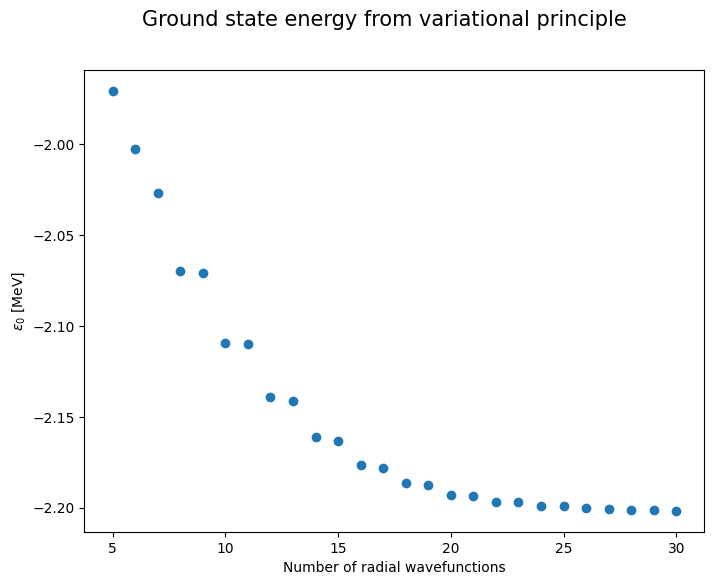

In [11]:
# Plot dei valori di energia ottenuti, a partire da M=5

valori_M = range(5,M+1)

fig, x = plt.subplots(1, figsize=(8, 6))

fig.suptitle('Ground state energy from variational principle', fontsize=15)

x.scatter(valori_M, ground_state[4:])

xlabel ('Number of radial wavefunctions')
ylabel (r'$\varepsilon_{0}$ [MeV]')

plt.show()